In [ ]:
import pandas as pd
import numpy as np
import collections

In [ ]:
test = pd.read_csv("/content/test.csv")
train = pd.read_csv("/content/train.csv")
train_len = len(train)

In [ ]:

data = pd.concat([train,test], sort = False)
Sex = collections.Counter(data["Sex"])
Embarked = collections.Counter(data["Embarked"])
Cabin = collections.Counter(data["Cabin"])
print(Embarked)
print(Cabin)

Counter({'S': 914, 'C': 270, 'Q': 123, nan: 2})
Counter({nan: 1014, 'C23 C25 C27': 6, 'G6': 5, 'B57 B59 B63 B66': 5, 'F33': 4, 'F2': 4, 'F4': 4, 'C78': 4, 'D': 4, 'C22 C26': 4, 'B96 B98': 4, 'B58 B60': 3, 'E101': 3, 'E34': 3, 'A34': 3, 'C101': 3, 'B51 B53 B55': 3, 'C85': 2, 'C123': 2, 'E46': 2, 'B78': 2, 'D33': 2, 'C52': 2, 'B28': 2, 'C83': 2, 'F G73': 2, 'E31': 2, 'D10 D12': 2, 'D26': 2, 'C2': 2, 'E33': 2, 'D36': 2, 'D15': 2, 'C93': 2, 'D35': 2, 'B77': 2, 'E67': 2, 'C125': 2, 'B49': 2, 'C106': 2, 'C65': 2, 'C54': 2, 'C7': 2, 'C32': 2, 'B18': 2, 'C124': 2, 'D37': 2, 'B35': 2, 'E50': 2, 'E44': 2, 'C92': 2, 'D21': 2, 'D20': 2, 'E25': 2, 'B22': 2, 'C86': 2, 'C68': 2, 'B41': 2, 'D19': 2, 'C126': 2, 'B71': 2, 'B5': 2, 'B20': 2, 'F G63': 2, 'C62 C64': 2, 'E24': 2, 'E8': 2, 'C46': 2, 'D30': 2, 'E121': 2, 'D17': 2, 'B69': 2, 'D28': 2, 'B45': 2, 'C31': 2, 'C55 C57': 2, 'C116': 2, 'C6': 2, 'C80': 2, 'C89': 2, 'C103': 1, 'D56': 1, 'A6': 1, 'B30': 1, 'A5': 1, 'C110': 1, 'F E69': 1, 'D47': 1, 'B86'

In [ ]:
data.isnull().sum()

PassengerId       0
Perished        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
data["Sex"].replace(["male","female"], [0, 1], inplace = True)
data.head()

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,0.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,0.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,0.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,1.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data["Fare"].fillna(np.mean(data["Fare"]), inplace = True)
data["Fare"].isnull().sum()

0

In [ ]:
data = data[["Perished","Pclass","Sex", "SibSp", "Parch", "Embarked","Fare"]]
data["Embarked"].fillna("S", inplace = True) #Sが多いので取り敢えずSで埋める
data["Embarked"].replace(["S","C", "Q"], [1,2,3], inplace=True)
data.isnull().sum()

Perished    418
Pclass        0
Sex           0
SibSp         0
Parch         0
Embarked      0
Fare          0
dtype: int64

In [ ]:
X = data.iloc[:train_len]
y = X["Perished"]
X = X.drop("Perished", axis = 1)
test = data.iloc[train_len:]
test.drop("Perished", axis = 1, inplace = True)
test.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Pclass,Sex,SibSp,Parch,Embarked,Fare
0,3,0,0,0,3,7.8292
1,3,1,1,0,1,7.0000
2,2,0,0,0,3,9.6875
3,3,0,0,0,1,8.6625
4,3,1,1,1,1,12.2875


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
model = RandomForestClassifier(max_depth = 5, n_estimators = 5, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model.fit(X_train, y_train)
score = model.score(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print("訓練時の精度"+str(score))
print("認識精度" +str(accuracy))

訓練時の精度0.8413173652694611
認識精度0.8116591928251121


In [ ]:
#再現率と適合率をみる
#f1-scoreは再現率と適合率の調和率
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.66      0.74        89
         1.0       0.80      0.91      0.85       134

    accuracy                           0.81       223
   macro avg       0.82      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



Text(91.68, 0.5, 'true value')

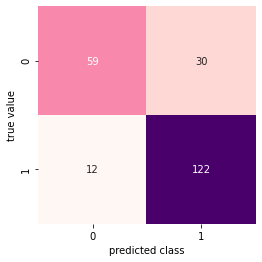

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('predicted class')
plt.ylabel('true value')

In [ ]:
#グリッドサーチ
parameters = {
    'n_estimators' :[3,5,10,30,50],
    'random_state' :[7,42],
    'max_depth' :[3,5,8,10],
}

from sklearn.model_selection import GridSearchCV
Grid = GridSearchCV(estimator= RandomForestClassifier(), param_grid=parameters, cv=3)
Grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
best_model = Grid.best_estimator_
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)
print("訓練での認識精度:" + str(train_score))
print("テストデータでの認識精度   :" + str(test_score))

pred_y = best_model.predict(X_test)
accuracy = accuracy_score(pred_y, y_test)
rlt = best_model.predict(test)
print("テストデータの認識精度ver2:" + str(accuracy))
print(Grid.best_estimator_)

訓練での認識精度:0.8173652694610778
テストデータでの認識精度   :0.8161434977578476
テストデータの認識精度ver2:0.8161434977578476
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)


Text(91.68, 0.5, 'true value')

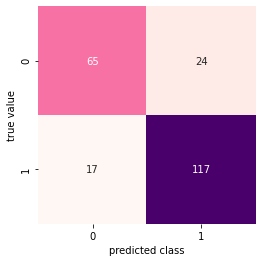

In [ ]:
mat = confusion_matrix(y_test, pred_y)
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('predicted class')
plt.ylabel('true value')
#訓練データの認識精度が少し下がっていたけどこっちでは上がってる！！！！

In [ ]:
#さらにグリッドサーチでパラメータを最適化してみる！
parameters = {
    'n_estimators' :[9,9.5,10,10.5,11],
    'random_state' :[7,42],
    'max_depth' :[2,2.5,3,3.5,4],
}

from sklearn.model_selection import GridSearchCV
Grid_2 = GridSearchCV(estimator= RandomForestClassifier(), param_grid=parameters, cv=3)
Grid_2.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be an integer, got <class 'float'>.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be an integer, got <class 'float'>.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: n_estimators must be an integer, got <class 'float'>.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
best_model_2 = Grid_2.best_estimator_
train_score = best_model_2.score(X_train, y_train)
test_score = best_model_2.score(X_test, y_test)
print("訓練での認識精度:" + str(train_score))
print("テストデータでの認識精度   :" + str(test_score))

pred_y = best_model_2.predict(X_test)
accuracy = accuracy_score(pred_y, y_test)
print("テストデータの認識精度ver2:" + str(accuracy))
print(Grid.best_estimator_)

訓練での認識精度:0.812874251497006
テストデータでの認識精度   :0.8026905829596412
テストデータの認識精度ver2:0.8026905829596412
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)


Text(91.68, 0.5, 'true value')

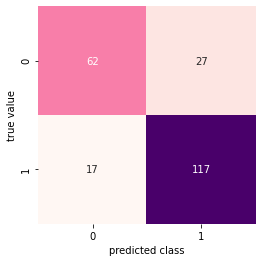

In [ ]:
mat = confusion_matrix(y_test, pred_y)
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('predicted class')
plt.ylabel('true value')
#ちょっと認識精度下がった？？

In [ ]:
#初めのGridのmodelを使って予測する

test.reset_index(drop = True, inplace =True)
test = test[["Pclass","Sex","SibSp","Parch","Embarked","Fare"]]

In [ ]:
rlt_1_list = pd.read_csv("/content/gender_submission.csv")
rlt_1_list["Perished"] = list(map(int, rlt))
rlt_1_list.head()

,PassengerId,Perished
0,892,1
1,893,0
2,894,1
3,895,1
4,896,0


In [ ]:
rlt_1_list.to_csv("submissionRF.csv", index = False)

In [ ]:
#続けてアンサンブルしてスコアを上げてみる！
#線形回帰
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty="l2",C=1.0,random_state = 42)
lr.fit(X_train, y_train)
print("訓練認識精度" + str(lr.score(X_train,y_train)))
print("テスト認識精度" + str(lr.score(X_test, y_test)))

訓練認識精度0.8008982035928144
テスト認識精度0.7892376681614349


In [ ]:
parameters = {
    'C' :[0.5,0.8,1,1.3,1.5],
    'random_state' :[7,42,1000],
}

from sklearn.model_selection import GridSearchCV
Grid_lr = GridSearchCV(estimator= LogisticRegression(), param_grid=parameters, cv=4)
Grid_lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.5, 0.8, 1, 1.3, 1.5],
                         'random_state': [7, 42, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
best_lr = Grid_lr.best_estimator_
print("訓練:"+ str(best_lr.score(X_train, y_train)))
print("テスト:"+ str(best_lr.score(X_test, y_test)))
#C=1で良かったんか
y_pred = best_lr.predict(X_test)
rlt_2 = best_lr.predict(test)

訓練:0.8008982035928144
テスト:0.7892376681614349


              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73        89
         1.0       0.81      0.85      0.83       134

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223



Text(91.68, 0.5, 'true value')

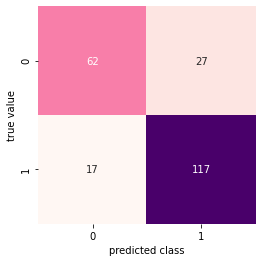

In [ ]:
print(classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, pred_y)
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('predicted class')
plt.ylabel('true value')

In [ ]:
rlt_2_list = pd.read_csv("/content/gender_submission.csv")
rlt_2_list["Survived"] = list(map(int, rlt_2))
rlt_2_list.head()

,PassengerId,Perished,Survived
0,892,1,1
1,893,0,0
2,894,1,1
3,895,1,1
4,896,0,0


In [ ]:
import xgboost as xgb
parameters = {
    'n_estimators' :[2,5,8,10,13],
    'random_state' :[7,42,100],
    'max_depth' :[2,4,6,8,10],
}

model_xgb = GridSearchCV(estimator= xgb.XGBClassifier(), param_grid=parameters, cv = 5)
model_xgb.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'n_estimators': [2, 5, 8, 10, 13],
                         'random_state': [7, 42, 100]},
     

In [ ]:
best_xgb = model_xgb.best_estimator_
print(best_xgb.score(X_test, y_test))
rlt_3 = best_xgb.predict(test)

0.8161434977578476


In [ ]:
rlt_3_list = pd.read_csv("/gender_submission.csv")
rlt_3_list["Survived"] = list(map(int, rlt_3))
rlt_3_list.head()

,PassengerId,Perished,Survived
0,892,1,1
1,893,0,0
2,894,1,1
3,895,1,1
4,896,0,0


In [ ]:
esb = pd.read_csv("/gender_submission.csv")
esb["Perished"] = rlt_1_list["Perished"] + rlt_2_list["Perished"] + rlt_3_list["Perished"]
esb.head()

,PassengerId,Perished
0,892,3
1,893,0
2,894,3
3,895,3
4,896,0


In [ ]:
esb["Perished"] = (esb["Perished"] >= 2).astype(int)
#2以上はTrueなので1

In [ ]:
esb.to_csv("submission1.csv", index = False)